In [0]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

1. Definição do indivíduo 


In [0]:
class City:
    def __init__(self, x, y): #construtor, parametro self obrigatório
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


2. Criar Individuo 


In [0]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

3. Criar População Incial

In [0]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

4 Definiçãao Da funçãao de Fitness

In [0]:
#Menor distância, maior será o fitness
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

5. Calculo do fitness

In [0]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

6. Seleção

In [0]:
# usa a saída de rankRota /  elitesize -> seleção com elitismo, que é parte da antiga população 
# que passa diretamente para a nova geração
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults # funçãão de selecao retorna uma lista de rotas IDs

In [0]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

7. cruzamento


In [0]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [0]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

8. Mutaçãão

In [0]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [0]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Função que produz a nova geração

In [0]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

função que define o algoritmo genetico

In [0]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [22]:
cityList = []
num_city = 25

for i in range(0,num_city):
  newCity = City(x=int(random.random()*200),y = int(random.random()*200))
  cityList.append(newCity)

  print(newCity)
  #plt.scatter(newCity.x,newCity.y)
  #plt.show()

(112,167)
(96,116)
(187,94)
(12,113)
(174,176)
(41,47)
(31,124)
(120,70)
(25,96)
(22,141)
(45,102)
(9,92)
(19,112)
(198,87)
(48,54)
(43,88)
(114,137)
(145,133)
(5,126)
(19,27)
(81,126)
(173,100)
(22,68)
(5,92)
(160,96)


Executa o AG com a passagem de parâmetros

In [26]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=0, mutationRate=0.01, generations=500)
#geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.1, generations=500)

Initial distance: 1625.3708242297525
Final distance: 1571.9130582656717


[(31,124),
 (160,96),
 (187,94),
 (173,100),
 (96,116),
 (43,88),
 (9,92),
 (145,133),
 (114,137),
 (174,176),
 (198,87),
 (120,70),
 (48,54),
 (12,113),
 (22,141),
 (5,92),
 (19,112),
 (5,126),
 (22,68),
 (19,27),
 (25,96),
 (41,47),
 (81,126),
 (45,102),
 (112,167)]

In [0]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distância')
    plt.xlabel('Geração')
    plt.show()

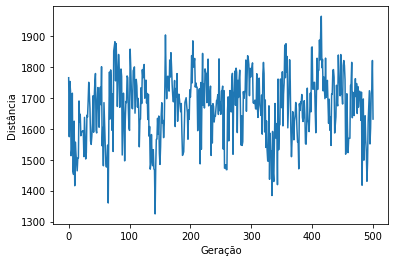

In [28]:
#geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.1, generations=500)
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=0, mutationRate=0.01, generations=500)